In [1]:
# In this notebook:
# I gather images of snakes and ladders from Google
# I utilize machine learning to recognize the image

In [2]:
from PIL import Image, ImageFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

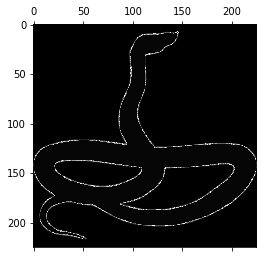

In [3]:
im = Image.open('s001.png')

plt.gray()

# im.show() # this opens image outside of notebook

plt.matshow(im)
plt.show()

<class 'PIL.PngImagePlugin.PngImageFile'>


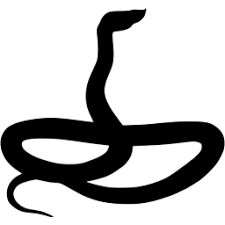

In [4]:
print(type(im))

im

In [5]:
imarr = np.asarray(im) # convert png to array

print(type(imarr))

imarr

<class 'numpy.ndarray'>


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Consolidate Data

In [6]:
import glob
import imageio

In [7]:
# testing dimensions of png
# this revealed some images had (225, 225, 3) dimensions; replaced

for img in glob.glob("./*.png"):
    pic = imageio.imread(img)
    picarr = np.asarray(pic)
    print (f'{img} has dimensions of {picarr.shape}')

.\s000.png has dimensions of (225, 225)
.\s001.png has dimensions of (225, 225)
.\s002.png has dimensions of (225, 225)
.\s003.png has dimensions of (225, 225)
.\s004.png has dimensions of (225, 225)
.\s005.png has dimensions of (225, 225)
.\s006.png has dimensions of (225, 225)
.\s007.png has dimensions of (225, 225)
.\s008.png has dimensions of (225, 225)
.\s009.png has dimensions of (225, 225)
.\s010.png has dimensions of (225, 225)
.\s011.png has dimensions of (225, 225)
.\s012.png has dimensions of (225, 225)
.\s013.png has dimensions of (225, 225)
.\s014.png has dimensions of (225, 225)
.\s015.png has dimensions of (225, 225)
.\s016.png has dimensions of (225, 225)
.\s017.png has dimensions of (225, 225)
.\s018.png has dimensions of (225, 225)
.\s019.png has dimensions of (225, 225)
.\s020.png has dimensions of (225, 225)
.\s021.png has dimensions of (225, 225)
.\s022.png has dimensions of (225, 225)
.\s023.png has dimensions of (225, 225)
.\s024.png has dimensions of (225, 225)


In [8]:
# consolidate and convert pngs to 1 array

pngarr = []
for img in glob.glob("./*.png"):
    pngarr.append(imageio.imread(img))    

pngarr = np.asarray(pngarr)

pngarr = pngarr.reshape(len(pngarr),
                        (pngarr.shape[1]*pngarr.shape[2]))

print (pngarr.shape)

(30, 50625)


In [9]:
# create identification for pngs
# 0 == snake 1 == ladder

pngid = np.full((30), 0)

pngid[15:] = 1

print(len(pngid))

pngid

30


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

Create Train and Test Data

In [10]:
import random

In [30]:
train_index = random.sample(range(len(pngarr)),
                            int(len(pngarr)/1.5))
test_index = [i for i in range(len(pngarr)) if i not in train_index]

print(f'training size: {len(train_index)}')
print(f'testing size: {len(test_index)}')

training size: 20
testing size: 10


In [31]:
train_png = [pngarr[i] for i in train_index]
test_png = [pngarr[i] for i in test_index]

In [32]:
train_id = [pngid[i] for i in train_index]
test_id = [pngid[i] for i in test_index]

Machine Learning

In [33]:
from sklearn import ensemble

In [34]:
classifier = ensemble.RandomForestClassifier()

classifier.fit(train_png, train_id)

score = classifier.score(test_png, test_id)

print(f'Prediction score is {score}')

Prediction score is 0.6


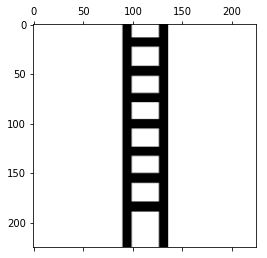

I think it is a ladder


In [56]:
# to visualize individual predictions

i = 20

pngview = np.reshape(pngarr, (30, 225,225))

plt.matshow(pngview[i])
plt.show()

pred = classifier.predict(pngarr[i].reshape(1, -1))

if pred == 0:
    print ('I think it is a snake')
else:
    print('I think it is a ladder')

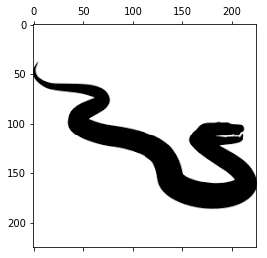

I think it is a snake


In [57]:
i = 2

pngview = np.reshape(pngarr, (30, 225,225))

plt.matshow(pngview[i])
plt.show()

pred = classifier.predict(pngarr[i].reshape(1, -1))

if pred == 0:
    print ('I think it is a snake')
else:
    print('I think it is a ladder')

In [ ]:
# notebook complete